入門教學網址: https://ai.google.dev/gemini-api/docs/get-started/python?hl=zh-tw&_gl=1*1arq9fu*_up*MQ..&gclid=Cj0KCQjwiYOxBhC5ARIsAIvdH50ud5pQ7DlJfvQsVWwBAsZVVSyn5szoEBRRYVE1RZoZgv9szSXPCboaAjlZEALw_wcB

### 匯入套件 

In [5]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown

# get .env variable for API key
from dotenv import load_dotenv 
load_dotenv()
import os

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

### 設定 API 金鑰

In [6]:
genai.configure(api_key=os.getenv('GOOGLE_API_KEY'))

### 根據輸入文字產生文字
#### 純文字

In [8]:
# 純文字提示，請使用 gemini-pro 模型
model = genai.GenerativeModel('gemini-pro')

# %%time
response = model.generate_content("What is the meaning of life?")
print(response.text)

# 在系統產生回應時串流處理回應，而且模型會在產生回應後立即傳回區塊。串流回覆
# response = model.generate_content("What is the meaning of life?", stream=True)
# for chunk in response:
#   print(chunk.text)
#   print("_"*80)

The meaning of life, a profound and complex philosophical question that has puzzled thinkers and inspired countless discussions throughout human history, remains an open and subjective inquiry. There is no universally accepted answer as it varies depending on individual beliefs, values, and experiences. However, here are some common perspectives on the meaning of life:

1. **Purpose and Fulfillment:** Some believe that life's meaning lies in finding one's purpose and striving to fulfill it. This could be through a career, creative endeavors, relationships, or any activity that brings a sense of accomplishment and fulfillment.

2. **Happiness and Well-being:** For many, the meaning of life is inextricably linked to happiness and well-being. They believe that life's purpose is to seek joy, contentment, and fulfillment in various aspects of life, such as relationships, health, and personal growth.

3. **Contribution and Legacy:** Others find meaning in making a difference in the world. Th

In [10]:
# 格式化的 Markdown 文字
to_markdown(response.text)

> The meaning of life, a profound and complex philosophical question that has puzzled thinkers and inspired countless discussions throughout human history, remains an open and subjective inquiry. There is no universally accepted answer as it varies depending on individual beliefs, values, and experiences. However, here are some common perspectives on the meaning of life:
> 
> 1. **Purpose and Fulfillment:** Some believe that life's meaning lies in finding one's purpose and striving to fulfill it. This could be through a career, creative endeavors, relationships, or any activity that brings a sense of accomplishment and fulfillment.
> 
> 2. **Happiness and Well-being:** For many, the meaning of life is inextricably linked to happiness and well-being. They believe that life's purpose is to seek joy, contentment, and fulfillment in various aspects of life, such as relationships, health, and personal growth.
> 
> 3. **Contribution and Legacy:** Others find meaning in making a difference in the world. They believe that life's purpose is to contribute to society, help others, and leave a positive legacy that extends beyond their own lifetime.
> 
> 4. **Connection and Relationships:** Life can be viewed as a journey of connecting with others, forming meaningful relationships, and fostering a sense of community. Some believe that the meaning of life lies in these connections and the love and support shared within them.
> 
> 5. **Exploration and Discovery:** Life can be seen as an adventure of exploration and discovery, both within oneself and the world around. The pursuit of knowledge, experiences, and personal growth can be seen as a way to find meaning and purpose.
> 
> 6. **Purpose as a Construct:** Some argue that the idea of life having a predefined meaning is a human construct. They believe that life is simply a series of experiences, and it is up to each individual to create their own meaning through their choices and actions.
> 
> 7. **Absence of Inherent Meaning:** A nihilistic perspective suggests that life has no inherent meaning and that the search for it is futile. However, this does not mean that life cannot be valued or experienced with purpose and fulfillment, even in the absence of an ultimate meaning.
> 
> Ultimately, the meaning of life is a deeply personal and subjective matter. It is a journey of exploration, self-discovery, and the ongoing process of assigning meaning to our own existence.

In [ ]:
# 如果 API 無法傳回結果
response.prompt_feedback

In [11]:
# 為單一提示產生多個可能的回應
response.candidates

[index: 0
content {
  parts {
    text: "The meaning of life, a profound and complex philosophical question that has puzzled thinkers and inspired countless discussions throughout human history, remains an open and subjective inquiry. There is no universally accepted answer as it varies depending on individual beliefs, values, and experiences. However, here are some common perspectives on the meaning of life:\n\n1. **Purpose and Fulfillment:** Some believe that life\'s meaning lies in finding one\'s purpose and striving to fulfill it. This could be through a career, creative endeavors, relationships, or any activity that brings a sense of accomplishment and fulfillment.\n\n2. **Happiness and Well-being:** For many, the meaning of life is inextricably linked to happiness and well-being. They believe that life\'s purpose is to seek joy, contentment, and fulfillment in various aspects of life, such as relationships, health, and personal growth.\n\n3. **Contribution and Legacy:** Others fi

### 根據圖片和文字輸入內容產生文字

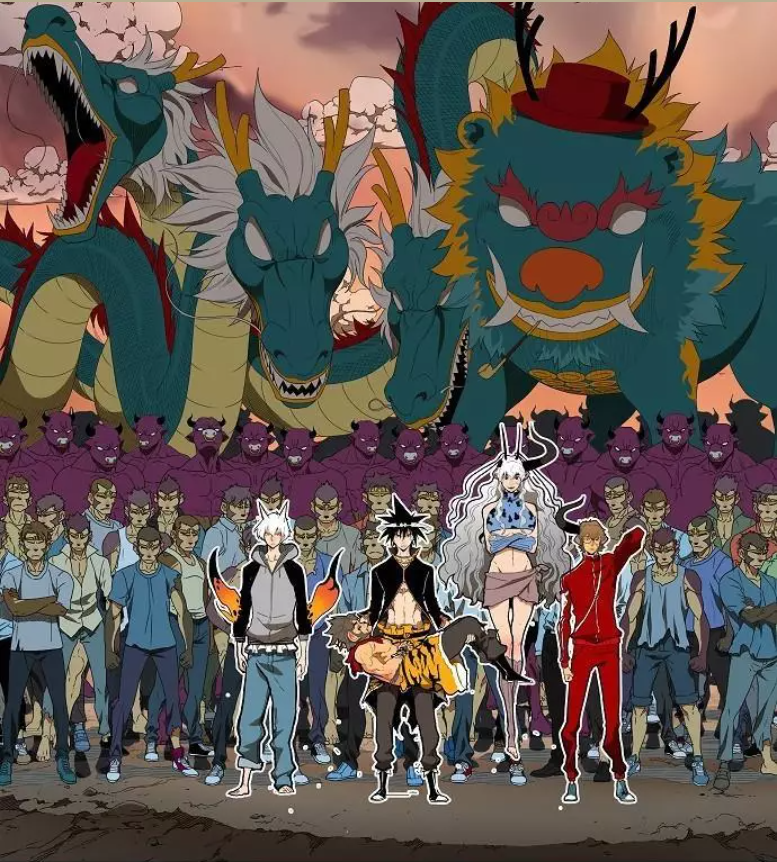

In [17]:
# 加入圖片
import PIL.Image

img = PIL.Image.open('./data/img/anime_test.png')
img

In [18]:
model = genai.GenerativeModel('gemini-pro-vision')
response = model.generate_content(img)

to_markdown(response.text)    

>  The image shows a group of people standing in front of a large group of monsters. The people are all wearing different clothes, but they all have the same determined look on their faces. The monsters are all different shapes and sizes, but they all look equally menacing. The scene is set in a ruined city, and the sky is dark and ominous. It is clear that these people are in a desperate battle for their survival.

#### 提示中提供文字和圖片
傳送包含字串和圖片的清單

In [19]:
response = model.generate_content(["Write a short, engaging blog post based on this picture. It should include a description of the meal in the photo and talk about my journey meal prepping.", img], stream=True)
response.resolve()
to_markdown(response.text)

>  Meal prepping is a great way to save time and money, and it can also help you to eat healthier. If you're new to meal prepping, it can be helpful to start with a few simple recipes. This meal is a great option for meal prepping because it is easy to make and can be reheated easily.
> 
> To make this meal, you will need:
> 
> * 1 pound of ground beef
> * 1/2 cup of chopped onion
> * 1/2 cup of chopped green bell pepper
> * 1 (15 ounce) can of black beans, rinsed and drained
> * 1 (15 ounce) can of corn, drained
> * 1 (10 ounce) can of diced tomatoes with green chilies, undrained
> * 1 teaspoon of chili powder
> * 1/2 teaspoon of ground cumin
> * 1/4 teaspoon of salt
> * 1/4 teaspoon of black pepper
> 
> Instructions:
> 
> 1. In a large skillet over medium heat, brown the ground beef, onion, and green bell pepper.
> 2. Stir in the black beans, corn, tomatoes, chili powder, cumin, salt, and black pepper.
> 3. Bring to a boil, then reduce heat and simmer for 15 minutes or until the ground beef is cooked through and the vegetables are softened.
> 4. Serve immediately or store in the refrigerator for later.
> 
> This meal is a great source of protein, fiber, and vitamins. It is also relatively low in calories and fat. If you are looking for a healthy and easy meal to meal prep, this is a great option.